In [4]:
# Goal: Investigate time-scale end of Arnett model (N*t_d ?)
import sys
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numba
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
import dynesty
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import seaborn
import tqdm
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.const as const
import snelib19odp.utils as utils
import snelib19odp.tigerfit as tigerfit
import snelib19odp.analysis.late_nickel as lateni

In [5]:
model = np.vectorize(tigerfit.Lum_rad)
model_heat = lateni.total_deposition

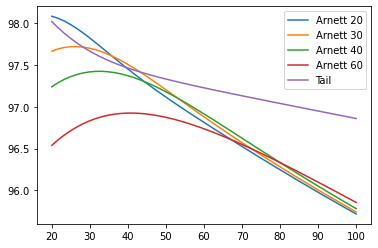

In [13]:
t_grid = np.linspace(20, 100)
mni = 0.2
for td in [20, 30, 40, 60]:
    lums = model(t_grid, mni, td, 0.3, 10e3, 30)
    plt.plot(t_grid, lums, label='Arnett %d' % td)
lums = np.log(model_heat(t_grid, 1000, mni))
plt.plot(t_grid, lums, label='Tail')
plt.legend()